<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/datasets/real_estate_data.csv')
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


### Вывод



<div class="alert alert-info"> 
Данные склеились, необходимо разделить. 
    
Изменим формат данных столбца 'first_day_exposition'.
    
Поменяем пропуски на 'False' в столбце 'is_apartment'.
    
Поменяем пропуски на 0 в столбцах 'balcony', 'days_exposition' и изменим тип данных на 'int', если потребуется.
    
Заменим пропуски в 'ceiling_height' на медиану.
    
Заменим пропуски в 'living_area': узнаем долю жилой площади от общей в имеющихся данных и рассчитаем жилую площадь там, где её нет 
    

## Предобработка данных

Определите и изучите пропущенные значения:
Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.
Заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения.
Укажите причины, которые могли привести к пропускам в данных.
Приведите данные к нужным типам:
Поясните, в каких столбцах нужно изменить тип данных и почему.

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
#Уберем ненужные нули из столбца 'first_day_exposition'
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
#для удобства отобразим данные столбца цены в миллионах, переименуем столбец:
data['last_price'] = data['last_price']/1000000
data.rename(columns={'last_price':'last_price_mln'}, inplace=True)
data.head()

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64.900,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
#Заполним пропуски нулями в столбце "балкон". Скорее всего, здесь пропуски свидетельствуют об отсутствии балкона
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

In [8]:
data['days_exposition'].isna().sum()

3181

In [9]:
#no_exposition = data.query('days_exposition.isna()')
#no_exposition['first_day_exposition'].hist(bins=100)

In [10]:
#no_exposition['first_day_exposition'].value_counts()

In [11]:
# Здесь речь идет о том, является ли объект апартаментами или нет (True or False). 
# Вероятнее всего, если графу не заполнили, значит это False
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [12]:
# Здесь заменим пропуски медианным значением
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [13]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()

0

In [14]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [15]:
# изменил код с учетом замечаний
k_area = data[data['living_area'].isnull() == False]['living_area'].mean() / data[data['living_area'].isnull()== False]['total_area'].mean()
data['living_area'] = data['living_area'].fillna(data['total_area']*k_area)

In [16]:
# Вставим столбец "доля жилой площади" 
data['living_area_ratio'] = data['living_area'] / data['total_area']
data.head()

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222
1,7,3.350,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396
2,10,5.196,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500
3,0,64.900,159.0,2015-07-24,3,2.65,14.0,91.177695,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.573445
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000


## Расчёты и добавление результатов в таблицу

<div class="alert alert-info"> 
Далее добавим в таблицу столбцы со следующими данными:
    
цена квадратного метра;

день недели, месяц и год публикации объявления;

этаж квартиры; варианты — первый, последний, другой;

отношение площади кухни к общей.

Соотношение жилой и общей площади уже сделано ранее. 

In [17]:
# Цена за квадрат
data['price_sq_m'] = data['last_price_mln'] / data['total_area']*1000000
data['price_sq_m'] = data['price_sq_m'].astype('int')
data.head()

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,price_sq_m
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,120370
1,7,3.350,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,82920
2,10,5.196,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,92785
3,0,64.900,159.0,2015-07-24,3,2.65,14.0,91.177695,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.573445,408176
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,100000


In [18]:
# Дата
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,price_sq_m,weekday_exposition,month_exposition,year_exposition
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,1.0,482.0,2.0,755.0,NaN,0.472222,120370,3,3,2019
1,7,3.350,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,0.0,NaN,0.0,NaN,81.0,0.460396,82920,1,12,2018
2,10,5.196,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,1.0,90.0,2.0,574.0,558.0,0.612500,92785,3,8,2015
3,0,64.900,159.0,2015-07-24,3,2.65,14.0,91.177695,9,False,...,2.0,84.0,3.0,234.0,424.0,0.573445,408176,4,7,2015
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,2.0,112.0,1.0,48.0,121.0,0.320000,100000,1,6,2018


In [19]:
# Категоризация данных по этажам
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'Первый'
    elif floor == floors_total:
        return 'Последний'
    else:
        return 'Другой'
data['floor_category'] = data.apply(floor_category, axis='columns')
data.head()

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,price_sq_m,weekday_exposition,month_exposition,year_exposition,floor_category
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,482.0,2.0,755.0,NaN,0.472222,120370,3,3,2019,Другой
1,7,3.350,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,NaN,0.0,NaN,81.0,0.460396,82920,1,12,2018,Первый
2,10,5.196,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,90.0,2.0,574.0,558.0,0.612500,92785,3,8,2015,Другой
3,0,64.900,159.0,2015-07-24,3,2.65,14.0,91.177695,9,False,...,84.0,3.0,234.0,424.0,0.573445,408176,4,7,2015,Другой
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,112.0,1.0,48.0,121.0,0.320000,100000,1,6,2018,Другой


In [20]:
# Округлим значения столбца доли жилой площади в общей
data['living_area_ratio'] = (data['living_area']/data['total_area']).round(2)
data.head()

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,price_sq_m,weekday_exposition,month_exposition,year_exposition,floor_category
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,482.0,2.0,755.0,NaN,0.47,120370,3,3,2019,Другой
1,7,3.350,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,NaN,0.0,NaN,81.0,0.46,82920,1,12,2018,Первый
2,10,5.196,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,90.0,2.0,574.0,558.0,0.61,92785,3,8,2015,Другой
3,0,64.900,159.0,2015-07-24,3,2.65,14.0,91.177695,9,False,...,84.0,3.0,234.0,424.0,0.57,408176,4,7,2015,Другой
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,112.0,1.0,48.0,121.0,0.32,100000,1,6,2018,Другой


In [21]:
# Доля кухни в общей площади
data['kitchen_area_ratio'] = (data['kitchen_area']/data['total_area']).round(2)
data.head()

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,price_sq_m,weekday_exposition,month_exposition,year_exposition,floor_category,kitchen_area_ratio
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2.0,755.0,NaN,0.47,120370,3,3,2019,Другой,0.23
1,7,3.350,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,0.0,NaN,81.0,0.46,82920,1,12,2018,Первый,0.27
2,10,5.196,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,2.0,574.0,558.0,0.61,92785,3,8,2015,Другой,0.15
3,0,64.900,159.0,2015-07-24,3,2.65,14.0,91.177695,9,False,...,3.0,234.0,424.0,0.57,408176,4,7,2015,Другой,NaN
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1.0,48.0,121.0,0.32,100000,1,6,2018,Другой,0.41


## Исследовательский анализ данных

Изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
Постройте гистограммы для каждого параметра.

In [22]:
# Исследование общей площади 
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [23]:
data['total_area'].sort_values()

19904     12.0
17961     13.0
19546     13.0
19807     13.0
19558     13.2
         ...  
5358     590.0
15651    618.0
3117     631.0
12859    631.2
19540    900.0
Name: total_area, Length: 23699, dtype: float64

In [24]:
data['total_area'].value_counts()

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.24       1
56.85       1
37.92       1
115.60      1
55.06       1
Name: total_area, Length: 2182, dtype: int64

<AxesSubplot:>

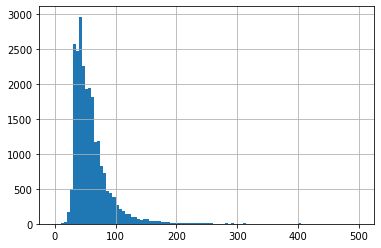

In [25]:
data['total_area'].hist(bins=100, range=(0, 500))

<div class="alert alert-info"> 
По таблице describe видно, что самая большая площадь, выставленная на продажу = 900 кв.м, самая маленькая = 12 кв.м, скорее всего это не вся квартира, а комната. Средняя площадь = 60,3 кв.м. Самые популярные квартиры на продажу площадью 45 кв.м. Из всего объема данных видно, что большинство квартир на продажу площадью до 70 кв.м - это третий квартиль. Распределение нормальное, критических выбросов нет

In [26]:
data['last_price_mln'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price_mln, dtype: float64

In [27]:
data['last_price_mln'].value_counts()

4.500000     342
3.500000     291
4.000000     260
4.300000     260
4.200000     259
            ... 
36.001900      1
10.660000      1
19.370000      1
3.937424       1
2.561000       1
Name: last_price_mln, Length: 2978, dtype: int64

<AxesSubplot:>

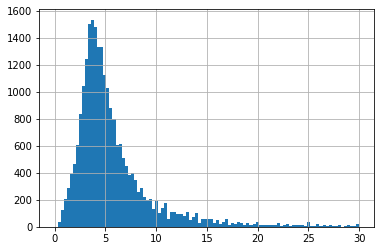

In [28]:
data['last_price_mln'].hist(bins=100, range=(0,30))

<div class="alert alert-info">
    Нормальное распределение, средняя стоимость квартиры = 6,5 млн, самый дорогой объект на продажу = 763 млн, самое дешевое предложение = 12,19 тыс, скорее всего на продажу выставлена доля в собственности, а не вся квартира. Больше всего предложений в пределах 3,4 - 6,8 млн

In [29]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [30]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [31]:
data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

In [32]:
data['rooms'].sort_values(ascending=False)

14498    19
18848    16
5358     15
20829    14
866      14
         ..
12737     0
15569     0
11331     0
9817      0
2727      0
Name: rooms, Length: 23699, dtype: int64

<AxesSubplot:>

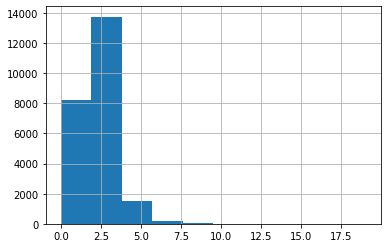

In [33]:
data['rooms'].hist()

<div class="alert alert-info"> Данные выглядят вполне логично: чаще всего продают одно-, двух-, и трехкомнатные квартиры. Преимущество однушек и двушек над трешками можно объяснить стремлением людей улучшить жилищные условия. Немного удивляет малое количество предложений где 0 комнат (это скорее студии и квартиры без отделки). 
    

In [34]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [35]:
data['ceiling_height'].value_counts()

2.65     9871
2.50     3515
2.60     1646
2.70     1574
3.00     1112
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [36]:
data['ceiling_height'].sort_values(ascending=False).head(10)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
4876      27.0
17857     27.0
5246      27.0
20478     27.0
22938     27.0
5807      27.0
Name: ceiling_height, dtype: float64

In [37]:
data['ceiling_height'].sort_values().head(10)

22590    1.00
5712     1.20
16934    1.75
20520    2.00
552      2.00
4212     2.00
5850     2.00
16884    2.00
19098    2.00
16446    2.00
Name: ceiling_height, dtype: float64

<AxesSubplot:>

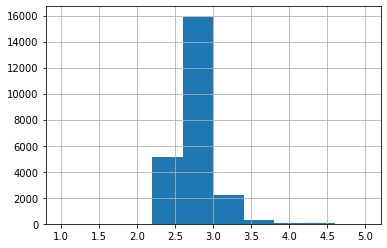

In [38]:
data['ceiling_height'].hist(range=(1, 5))

<div class="alert alert-info"> Высота потолков в 1 метр и в 100 метров являются единичными выбивающимися значениями, которые однако не влияет на общее распределение. Тем не менее, от таких выбросов лучше избавляться.  

Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [39]:
exposition = data.query('days_exposition!=days_exposition.isna()')

In [40]:
exposition['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [41]:
exposition['days_exposition'].value_counts().head(10)

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
Name: days_exposition, dtype: int64

<AxesSubplot:>

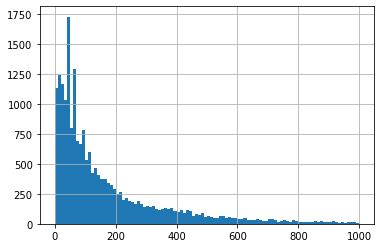

In [42]:
exposition['days_exposition'].hist(bins=100, range=(0, 1000))

<AxesSubplot:>

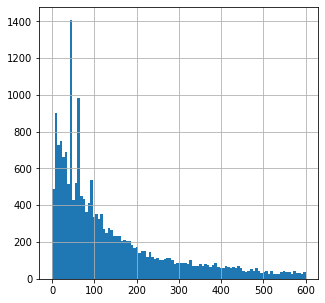

In [43]:
exposition['days_exposition'].hist(bins=100, range=(0,600), figsize=(5,5))

<AxesSubplot:ylabel='Frequency'>

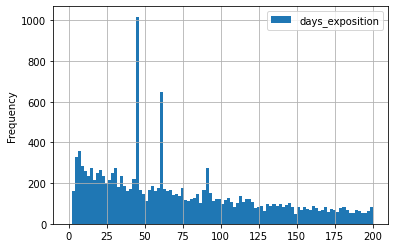

In [44]:
exposition.plot(y='days_exposition', kind='hist', bins=100, range=(0,200), grid=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f898f028be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f898efb52e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f898f028880>],
 'medians': [<matplotlib.lines.Line2D at 0x7f898efb59a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f898efb5d00>],
 'means': []}

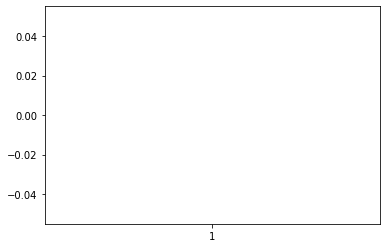

In [45]:
plt.boxplot(exposition['days_exposition'])


In [92]:
import numpy as np
if np.isnan(exposition['days_exposition']).any():
  print("There are NaN values, I need to remove")

There are NaN values, I need to remove


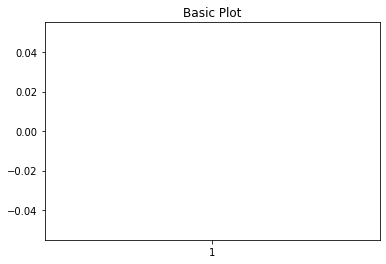

In [93]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(exposition['days_exposition'])
plt.show()

<AxesSubplot:>

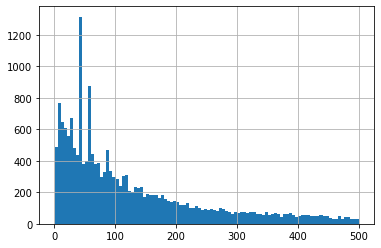

In [47]:
data['days_exposition'].hist(bins=100, range=(1, 500))

<div class="alert alert-info">  
    
Describe показывает межквартильный размах - от 45 до 232 дней, ???(на boxplot верхняя граница размаха в районе 500, очень много необоснованно долгих объявлений (выбросов))???. 

Среднее количество дней с учетом аномальных значений = 180, медиана = 95 дней. На графике видно что есть несколько - явные выбивающиеся, мешающие исследованию. Методом value_counts определили эти значения. Что касается 45, 60, 90, то здесь скорее всего речь идет о конкретных сроках размещения, по истечению которых владельцы должны их продлевать, иначе они автоматически снимаются. Вполне возможно что и значения 7 и 30 дней также являются сроками, которые надо продлевать. 



<div class="alert alert-info"> Если брать межквартильный размах, в данном случае если квартира продалась за 45 дней - это очень быстро, от 45 до 232 - нормально, от 232 до 500 - долго, дольше 500 дней - аномально долго

Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

In [48]:
data['days_exposition'].value_counts().head(10)

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
Name: days_exposition, dtype: int64

<AxesSubplot:>

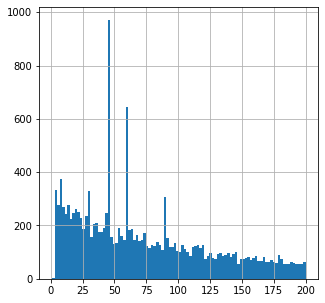

In [49]:
data['days_exposition'].hist(bins=100, range=(1,200), figsize=(5,5))

In [50]:
import numpy as np
#Избавимся от аномалий
good_data = exposition.query('days_exposition !=7 and days_exposition !=30 and days_exposition !=45 and days_exposition !=60 and days_exposition !=90')
#good_data = good_data.query("days_exposition not in [7,30,45,60,90]")
#good_data = good_data.loc[good_data['days_exposition'] != 90]
good_data = good_data.drop(np.where(good_data['days_exposition'] == 90)[0])
good_data['days_exposition'].value_counts()
#good_data['days_exposition'].hist(bins=100, range=(0,100))

45.0      880
90.0      204
4.0       176
3.0       158
5.0       152
         ... 
1452.0      1
1280.0      1
844.0       1
1344.0      1
1174.0      1
Name: days_exposition, Length: 1138, dtype: int64

<div class="alert alert-info">  Снова проблема - значения 45 и 90 все равно учитываются. Что происходит????

{'whiskers': [<matplotlib.lines.Line2D at 0x7f898f1ca910>,
 'caps': [<matplotlib.lines.Line2D at 0x7f898f1e0e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f898f1ca100>],
 'medians': [<matplotlib.lines.Line2D at 0x7f898efd4f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f898efd4460>],
 'means': []}

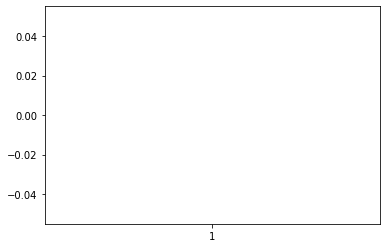

In [51]:
plt.boxplot(good_data['days_exposition'])

In [52]:
good_data['days_exposition'].describe()

count    19538.000000
mean       187.906388
std        222.813722
min          1.000000
25%         45.000000
50%        104.000000
75%        244.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [53]:
good_data['days_exposition'].value_counts()

45.0      880
90.0      204
4.0       176
3.0       158
5.0       152
         ... 
1452.0      1
1280.0      1
844.0       1
1344.0      1
1174.0      1
Name: days_exposition, Length: 1138, dtype: int64

<div class="alert alert-info"> После избавления от аномалий, средний срок размещения (=срок продажи) и медиана увеличились = 195 вместо 156 (mean) и 144 вместо 74 (median). Максимальная граница нормального распределения также сдвинулась вверх до значения в 600 дней.  

In [54]:
good_data2 = data.query('last_price_mln<20 and 2.2<=ceiling_height<=4 and total_area<200')
good_data2_ratio = len(good_data2['total_area'])/len(data['total_area'])
good_data2_ratio                                                     

0.9645976623486223

<div class="alert alert-info"> Исключили 4 процента данных

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

<AxesSubplot:xlabel='total_area'>

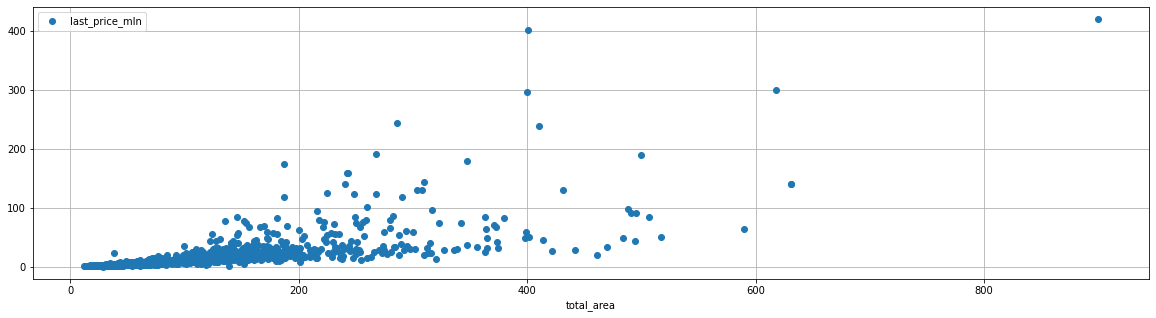

In [55]:
#зависимость цены кв. метра от общей площади
pivot_price_area = data.pivot_table(index = 'total_area', values = 'last_price_mln', aggfunc=['mean', 'median'])
#pivot_price_area.mean()
pivot_price_area.plot(y='mean', figsize=(20,5), style='o', grid=True)

In [56]:
data['total_area'].corr(data['last_price_mln'])

0.6536750579657246

<div class="alert alert-info">
коэффициент корреляции высокий - стоимость квартиры увеличивается при увеличении площади. 

In [57]:
#зависимость цены кв. метра от числа комнат
pivot_price_rooms = data.pivot_table(index='rooms', values='last_price_mln', aggfunc=['mean', 'count', 'median'])
pivot_price_rooms

,mean,count,median
,last_price_mln,last_price_mln,last_price_mln
rooms,,,
0,3.337724,197,2.700000
1,3.835362,8047,3.600000
2,5.591605,7940,4.770169
3,8.179119,5814,6.200000
4,13.423497,1180,9.000000
5,23.762082,326,14.000000
6,31.709752,105,19.000000
7,51.470069,59,24.900000


<AxesSubplot:xlabel='rooms'>

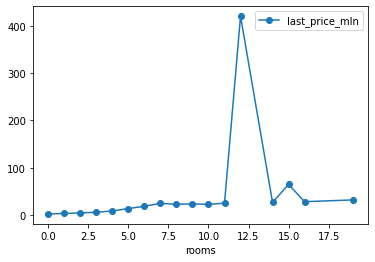

In [58]:
pivot_price_rooms.plot(y='median', style='-o')

In [59]:
data['rooms'].corr(data['last_price_mln'])

0.3633428499648953

<div class="alert alert-info"> Анализ показывает что количество комнат не так сильно влияет на стоимость квартиры, особенно в самых распространенных планировках (до 4-х комнат).

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price_mln'>

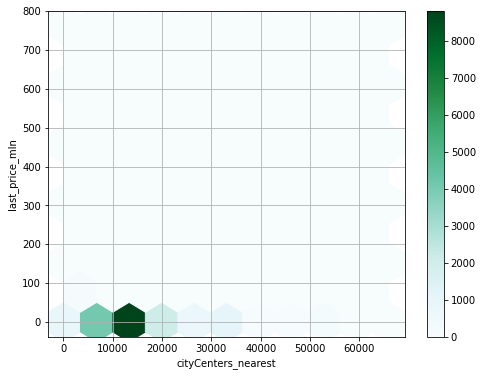

In [60]:
#зависимость цены кв. метра от удаленности от центра
#data.plot(kind='scatter',  y='price_sq_m', x='cityCenters_nearest', alpha=0.5)
data.plot(kind='hexbin', gridsize=10, figsize=(8, 6), sharex=False, grid=True, x='cityCenters_nearest', y='last_price_mln')

In [61]:
data['cityCenters_nearest'].corr(data['last_price_mln'])

-0.20674734874298373

<div class="alert alert-info"> Чем дальше от центра, тем дешевле

In [62]:
#зависимость цены кв. метра от этажа (первый, последний, другой)
pivot_price_floor = data.pivot_table(index='floor_category', values='last_price_mln', aggfunc=['mean', 'count', 'median'])
pivot_price_floor

,mean,count,median
,last_price_mln,last_price_mln,last_price_mln
floor_category,,,
Другой,6.675444,17446,4.85
Первый,4.803560,2917,3.90
Последний,7.361025,3336,4.30


<AxesSubplot:xlabel='floor_category'>

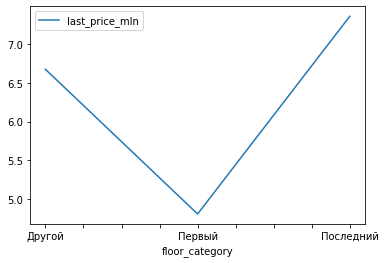

In [63]:
pivot_price_floor.plot(y='mean')

<div class="alert alert-info"> Точно можно сказать только то, что первый этаж дешевле, чем последний

<AxesSubplot:xlabel='weekday_exposition'>

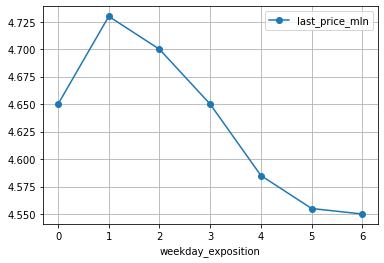

In [64]:
#зависимость цены кв. метра от даты размещения (дня недели, месяца и года)
pivot_price_weekday = data.pivot_table(index='weekday_exposition', values='last_price_mln', aggfunc=['mean', 'count', 'median'])
pivot_price_weekday.plot(y='median', style='-o', grid=True)


<div class="alert alert-info"> По вторникам публикуют объявления с более высокой ценой, в течение недели цена падает, в воскресенье самая низкая. Возможно это связано с тем, что в будни больше публикуют предложений от риэлторов, агентств,  которые выставляют цену с учетом своей комиссии, в то время как по выходным больше частников.

<AxesSubplot:xlabel='month_exposition'>

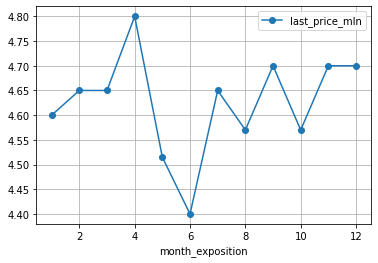

In [65]:
pivot_price_month = data.pivot_table(index='month_exposition', values='last_price_mln', aggfunc=['mean', 'count', 'median'])
pivot_price_month.plot(y='median', style='-o', grid=True)

<div class="alert alert-info"> Играет роль фактор сезонности. Скорее всего именно в середине весны и начале осени повышается спрос на покупку квартиры, банки пересматривают ипотечные ставки, и это толкает цену вверх. Летом и в зимний праздничный сезон деловая активность низкая

<AxesSubplot:xlabel='year_exposition'>

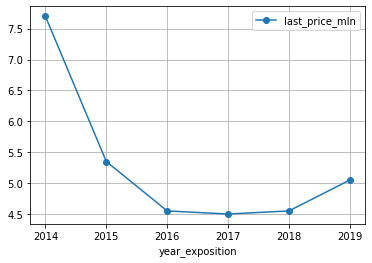

In [66]:
pivot_price_year = data.pivot_table(index='year_exposition', values='last_price_mln', aggfunc=['mean', 'count', 'median'])
pivot_price_year.plot(y='median', grid=True, style='-o')


<div class="alert alert-info"> Из-за общей экономической ситуации и снижением покупательской способности населения, наблюдаем спад с 2014 по 2016, в 2016-2018 уровень оставался примерно на одном уровне, и небольшой подъем в 2018. Интересно было бы посмотреть на свежие данные с учетом пандемии и текущих событий 

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name

In [67]:
rating = data.pivot_table(index='locality_name', values='price_sq_m', aggfunc=['mean', 'count'])
rating.columns=['average_price_sq_m', 'for_sale']
top_ten=rating.sort_values(by='for_sale', ascending=False).head(10)
top_ten

,average_price_sq_m,for_sale
locality_name,,
Санкт-Петербург,114848.552891,15721
посёлок Мурино,85751.727969,522
посёлок Шушары,78676.893182,440
Всеволожск,68653.997487,398
Пушкин,103125.352304,369
Колпино,75424.144970,338
посёлок Парголово,90175.477064,327
Гатчина,68745.684039,307
деревня Кудрово,92473.070234,299


In [68]:
top_ten.query('average_price_sq_m==average_price_sq_m.min()')
#rating.query('average_price_sq_m==average_price_sq_m.min()')

,average_price_sq_m,for_sale
locality_name,,
Выборг,58141.468354,237


In [69]:
top_ten.query('average_price_sq_m==average_price_sq_m.max()')
#rating.query('average_price_sq_m==average_price_sq_m.max()')

,average_price_sq_m,for_sale
locality_name,,
Санкт-Петербург,114848.552891,15721


<div class="alert alert-info"> 
Из топ-10 регионов в Санкт-Петербурге с самой высокой ценой за квадратный метр 1-е место занимает Санкт-Петербург,

10-е место - у Выборга

Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [70]:
data['cityCenters_nearest'].sort_values(ascending=False).head()

9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
Name: cityCenters_nearest, dtype: float64

In [71]:
#с учетом sort_values, заменим пропуски на 70 км - условную границу
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(70000)
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')

In [72]:
spb_center=data.query('locality_name=="Санкт-Петербург" and cityCenters_nearest_km < 70').pivot_table(index='cityCenters_nearest_km', values='last_price_mln', aggfunc='mean')
spb_center

,last_price_mln
cityCenters_nearest_km,
0,23.442315
1,18.850852
2,16.163314
3,13.436831
4,13.632025
5,15.306121
6,14.389106
7,12.797674
8,8.445272


<AxesSubplot:xlabel='cityCenters_nearest_km'>

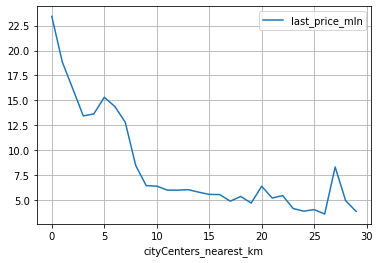

In [73]:
spb_center.plot(grid=True)

<div class="alert alert-info"> Радиус центральной зоны Санкт-Петербурга = 6 км

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [74]:
piter_data = data.query('locality_name=="Санкт-Петербург" and cityCenters_nearest_km<6')
piter_data.head()

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,living_area_ratio,price_sq_m,weekday_exposition,month_exposition,year_exposition,floor_category,kitchen_area_ratio,cityCenters_nearest_km
24,8,6.50,97.2,2015-10-31,2,2.65,3.0,46.5,1,False,...,124.0,265.0,0.48,66872,5,10,2015,Первый,0.20,2
35,6,15.50,149.0,2017-06-26,5,2.65,5.0,104.0,4,False,...,779.0,644.0,0.70,104026,0,6,2017,Другой,0.11,3
61,18,7.99,74.0,2017-08-24,2,2.65,4.0,43.0,4,False,...,NaN,609.0,0.58,107972,3,8,2017,Последний,0.27,4
63,2,20.00,118.0,2018-09-11,3,3.00,9.0,68.0,7,False,...,779.0,37.0,0.58,169491,1,9,2018,Другой,0.14,4
99,32,9.60,90.0,2017-09-26,4,2.65,5.0,67.0,2,False,...,NaN,104.0,0.74,106666,1,9,2017,Другой,0.09,2


In [75]:
piter_data['total_area'].describe()

count    2835.000000
mean       96.064526
std        60.793969
min        12.000000
25%        60.000000
50%        82.000000
75%       113.000000
max       631.200000
Name: total_area, dtype: float64

<div class="alert alert-info"> Средняя площадь квартиры в центре = 96 кв.м, минимальная = 12 кв.м, максимальная = 631. 
    
Межквартильный размах = от 60 до 113 кв.м.

In [76]:
piter_data['last_price_mln'].describe()

count    2835.000000
mean       15.063424
std        25.479547
min         1.600000
25%         6.900000
50%         9.490000
75%        14.650000
max       763.000000
Name: last_price_mln, dtype: float64

In [77]:
piter_data['last_price_mln'].sort_values()

23394      1.6000
19558      1.6860
17753      1.8000
19546      1.8500
10208      1.9000
           ...   
22831    289.2384
15651    300.0000
1436     330.0000
14706    401.3000
12971    763.0000
Name: last_price_mln, Length: 2835, dtype: float64

<div class="alert alert-info">Показатели цены в центре в два раза превышают общегородские

In [78]:
piter_data['rooms'].describe()

count    2835.000000
mean        2.948148
std         1.506207
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        19.000000
Name: rooms, dtype: float64

In [79]:
piter_data['rooms'].value_counts()

3     870
2     786
4     434
1     379
5     207
6      76
7      51
0      11
8      10
9       3
10      2
11      2
14      1
16      1
15      1
19      1
Name: rooms, dtype: int64

<div class="alert alert-info"> В отличие от общих данных, в центре трешки самые продаваемые, а предложений по продаже 4хкомнатных больше, чем однушек - люди неохотно продают маленькие квартиры в центре, а спрос на них всегда высокий.

In [80]:
piter_data['ceiling_height'].describe()

count    2835.000000
mean        2.987235
std         0.803991
min         2.400000
25%         2.650000
50%         2.900000
75%         3.200000
max        32.000000
Name: ceiling_height, dtype: float64

In [81]:
piter_data['ceiling_height'].value_counts()

2.65     978
3.00     352
3.20     154
3.50     101
2.70     100
        ... 
3.43       1
27.00      1
3.24       1
4.14       1
3.42       1
Name: ceiling_height, Length: 141, dtype: int64

<div class="alert alert-info"> Тут ситуация по сути такая же как и общая по городу

Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

<AxesSubplot:xlabel='rooms'>

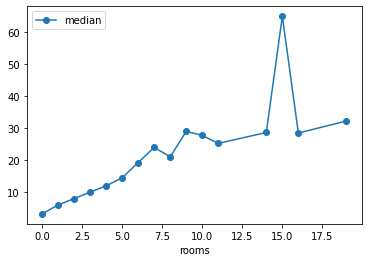

In [82]:
rooms_piter_data = piter_data.pivot_table(index='rooms', values='last_price_mln', aggfunc=('mean', 'count', 'median'))
rooms_piter_data.plot(y='median', style='-o')

In [83]:
piter_data['rooms'].corr(piter_data['last_price_mln'])

0.2969637823030159

<div class="alert alert-info"> В "золотом треугольнике" картина от общей отличается: чем больше комнат - тем выше цена  

<AxesSubplot:xlabel='floor_category'>

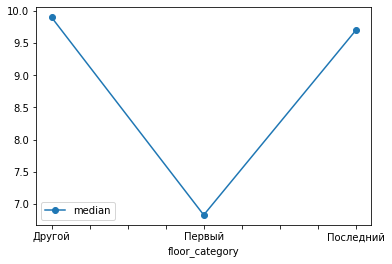

In [84]:
floors_piter_data = piter_data.pivot_table(index='floor_category', values='last_price_mln', aggfunc=('mean', 'count', 'median'))
floors_piter_data.plot(y='median', style='-o')

In [85]:
piter_data.pivot_table(index='floor_category', values = 'last_price_mln', aggfunc=('mean', 'median'))

,mean,median
floor_category,,
Другой,14.944341,9.90
Первый,9.449389,6.83
Последний,18.997265,9.70


<div class="alert alert-info"> Интересно, что здесь, в отличие от общих данных, цены первого и последнего этажа практически одинаковы. Получается, не важно нак каком этаже, главное - в центре ))

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price_mln'>

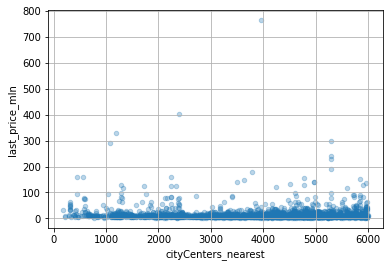

In [86]:
piter_data.plot(kind='scatter', x='cityCenters_nearest', y='last_price_mln', grid=True, alpha=0.3 )
#piter_data.plot(kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, x='cityCenters_nearest', y='price_sq_m')

In [87]:
piter_data['cityCenters_nearest'].corr(piter_data['price_sq_m'])

-0.062300401942798504

<div class="alert alert-info">В пределах изучаемых границ центральной зоны радиусом 6 км зависимость уже не наблюдается, что ожидаемо.

<AxesSubplot:xlabel='weekday_exposition'>

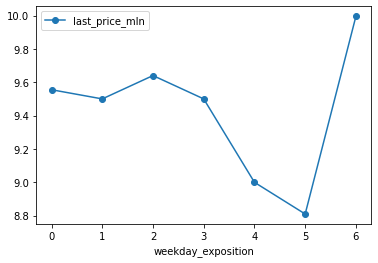

In [88]:
weekday_piter_data = piter_data.pivot_table(index='weekday_exposition', values='last_price_mln', aggfunc=['mean', 'count', 'median'])
weekday_piter_data.plot(y='median', style='-o')

<AxesSubplot:xlabel='month_exposition'>

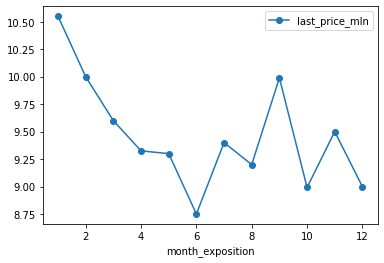

In [89]:
month_piter_data = piter_data.pivot_table(index='month_exposition', values='last_price_mln', aggfunc=['mean', 'count', 'median'])
month_piter_data.plot(y='median', style='-o')

<div class="alert alert-info"> Здесь ситуация примерно такая же как и по общим данным

<AxesSubplot:xlabel='year_exposition'>

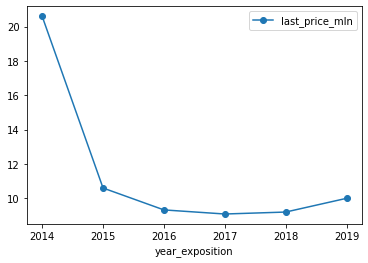

In [90]:
year_piter_data = piter_data.pivot_table(index='year_exposition', values='last_price_mln', aggfunc=['mean', 'count', 'median'])
year_piter_data.plot(y='median', style='-o')

<div class="alert alert-info">Ожидаемо, что годовые показатели не отличаются от значений  по всей базе

## Общий вывод

<div class="alert alert-info"> 
В данном проекте был исследован архив объявлений Яндекс.Недвижимости Санкт-Петербурга за 2014-2019 гг. Была проведена предварительная обработка данных: для удобства изменена стоимость на миллионы, отформатированы даты публикаций, произведена замена пропусков в столбцах "Балкон", "Апартаменты", "Длительность размещения", "Высота потолков", "Жилая площадь".

Пропуски в балконах мы заменили на 0, т.к. логично предположили, что отсутсвие данных равнозначно отсутствию балкона.

По той же логике заменили на False пропуски в столбце "Апартаменты".

Пропуски в данных длительности размещения заменили на 0, предполагая что объывление было снято в тот же день, возможно автоматически (предположение, нужно уточнить у разработчиков). В дальнейшем анализе сроков продажи квартир на Яндекс.Недвижимости эти данные показали себя как аномалии (что неудивительно) и были убраны.

Недостающие показатели высоты потолков заменили на медианное значение.
Для пропуков в жилой площади рассчитали этот показатель с учетом среднего значения доли к общей площади по всей базе данных.
 
Далее провели расчеты и добавили в таблицу столбцы со следующими данными: цена квадратного метра; день неделя, месяц и год публикации объявления; этаж квартиры; варианты — первый, последний, другой; отношение площади кухни к общей.

Исследовательский анализ данных выявил средние, минимальные и максимальные показатели, а также выбивающиеся значения в таких параметрах как площадь, цена, число комнат, высота потолков. Согласно анализу, средняя стоимость квартиры в Санкт-Петербурге за отчетный период = 6,5 млн, больше всего предложений 1, 2, 3хкомнатных квартир. Очень мало квартир, где комнат не указано (0), скорее всего это студии либо новостройки без отделки - всего 159 объявлений. 
    
Анализ сроков продажи (сроков публикации) показал, что эти данные неправильные и не соответствуют действительности. Очень много аномалий - объявлений, снятых с публикации через 0, 7, 30, 45, 60 и 90 дней. Вероятнее всего в данном случае мы имеем дело с автоматическим прекращением публикации по какой-либо причине (уточнить у разработчиков). Данные аномалии были опущены, что отобразило нормальное распределение и более правдивые показатели сроков продажи. В среднем квартира продается за 195 дней, медианное значение = 114 дней, межквартильный размах = от 44 до 259 дней, нормальное распределение = от 1 до 600 дней. 

Больше всего на стоимость квадратного метра влияет площадь квартиры и ее местоположение - чем ближе к центру тем дороже. Первый этаж дешевле последнего. Также влияет и сезонность - весной и осенью цена идет вверх, во время отпусков и зимних праздников активность ниже. Анализ продаж в центральной зоне Санкт-Петербурга (в радиусе 6 км от центра) показал что средняя цена за квадрат в два раза выше общей средней по всей базе, в центре гораздо чаще продают трёшки, в общих данных превалируют однушки. Также в центре чаще расстаются 4-хкомнатными кватирами, чем в целом по городу , и очень неохотно с однушками (наверно влияют большие расходы на коммуналку). 
    
Общая тенденция по годам показывает падение цен с 2014 до 2016 года и их постепенный дальнейший рост. На это оказала влияние общая экономическая ситуация в стране.

